
# La librairie Pandas
_________________________________

## Informations
#### Titre du cours 
Python pour la Data Visualisation : La librairie pandas
#### Durée du cours  
1h 

_________________________________

## Contexte
#### Pré-requis
- Connaissance de la syntaxe Python 
- Connaissance de la programmation orientée objet en Python 
- Mathématique niveau lycée 
- De la bonne humeur et de la motivation 🚀

Comme expliqué dans l'introduction, la visualisation de données est un ensemble de méthodes graphiques. Afin de produire une représentation graphique de données, il est nécessaire de manipuler, traiter les données. En python, on utilise pour cela la librairie Pandas. 

Vous devez vous demander pourquoi utiliser encore une autre librairie pour des tableaux  🧐

La réponse est que Pandas permet de manipuler de gros volumes de données de différents formats de façon assez intuitive. Dans ce cours nous allons donc étudier cette librairie en détail et notamment les opérations autour de son objet principal, le `Dataframe`. 

_________________________________

## Sommaire 
* [Toujours plus de tableaux, de numpy à pandas](#pandas-kesako)
* [Les objets pandas : Les Series](#series)
* [Les objets pandas : Les DataFrame](#df)
* [La gestion des fichiers](#files)
* [La gestion des valeurs manquantes](#nan)
* [La gestion des dates](#date)
* [La visualisation avec matplotlib](#date)


_________________________________


## [Toujours plus de tableaux, de numpy à pandas](#pandas-kesako)

Comme énoncé dans l'introduction, Pandas est une librairie Python qui permet de manipuler facilement des données. Notamment des données sous forme de tableaux à double entrées avec des étiquettes de variables (des colonnes) et d'individus (des lignes). 

Ces tableaux de données sont appelés `DataFrames`. On peut facilement lire et écrire ces `DataFrames` à partir de fichiers comme un fichier excel par exemple.  Il est également assez simple de tracer des graphiques à partir de ces objets `DataFrames` grâce aux librairies matplotlib et seaborn.

La première chose à faire est d'importer la librairie. 

```python
import pandas as pd
```
On importe la librairie pandas en utilisant le mot clef `as` qui va nous permettre d'alléger la syntaxe afin d'appeler les fonctions de la librairie de la façon suivante :
```python
my_function = pd.pandas_function()
```

plutôt que :  
```python 
my_function = pandas.pandas_function()
```

C'est sans doute pas grand chose, mais c'est du temps de gagné dans votre journée si vous utilisez souvent les fonctions de Pandas. 

In [2]:
import pandas as pd 
import numpy as np 
print('libs loaded')

libs loaded


## [Les Series](#series)

Les `Series` sont un des objets principal de la librairie Pandas, une `Series` à `n` valeurs peut être vue comme un vecteur de dimension `(1,n)`, ou encore un tableau à une dimension 🧮

Pour construire une `Series`, on utilise la fonction `Series()` de Pandas en lui passant en argument une liste tel que :   

```python
pd.Series([0.25, 0.5, 0.75, 1.0])
```

In [3]:
l=[0.25, 0.5, 0.75, 1.0]
data = pd.Series(l); data

0    0.25
1    0.50
2    0.75
3    1.00
dtype: float64

Lors de l'affichage de la `Series` on voit `dtype: float64` 🧐

C'est le type des éléments qui composent la `Series`. On peut le voir notamment avec l'attribut `dtypes`. 

In [4]:
#types 
data.dtypes

dtype('float64')

On peut remarquer aussi une liste de valeur sur le côté gauche. Ce sont les **index** c-a-d l'emplacement des valeurs. Ce qui pourrait correspondre aux numéros de lignes et de colonnes sur un logiciel de traitement de données type excel, google sheets, numbers... 

On utilise les commandes `index` pour accéder à l'index et `values` pour les valeurs de la `Series`. 

In [5]:
data.index

RangeIndex(start=0, stop=4, step=1)

In [6]:
data.values

array([0.25, 0.5 , 0.75, 1.  ])

On peut aussi stocker différents types de données dans les `Series`, tel que les `string` 

In [7]:
data_str = pd.Series(['il', 'fait', 'pas trop', "moche aujourd'hui !"]); data_str

0                     il
1                   fait
2               pas trop
3    moche aujourd'hui !
dtype: object

Il est possible d'effectuer des opérations mathématiques élémentaires sur les `Series` tel que l'addition `+, -, *, /`. 

🚧 Attention toutefois aux `NaN` et à bien utiliser ces opérations sur des `Series` avec de même type !

In [8]:
s1 = pd.Series([1, 2, 3])
s2 = pd.Series([4, 5, 6,4])
plus = s1 + s2
moins = s1 - s2
fois = s1 * s2
div = s1 / s2;div

0    0.25
1    0.40
2    0.50
3     NaN
dtype: float64

🚧 Attention aussi à la dimension / `shape` de vos données. 

## [Les DataFrame](#df)

Le `Dataframe` se comporte comme un dictionnaire dont les clefs sont les noms des colonnes et les valeurs sont des `Series`. 

**On peut les créer à partir d'un array numpy ou bien d'un dictionnaire.**

In [32]:
ar = np.array([[1.1, 2, 3.3, 4], [2.7, 10, 5.4, 7], [5.3, 9, 1.5, 15]])
print (ar)
df = pd.DataFrame(ar, index = ['a1', 'a2', 'a3'], columns = ['A', 'B', 'C', 'D']); df

[[ 1.1  2.   3.3  4. ]
 [ 2.7 10.   5.4  7. ]
 [ 5.3  9.   1.5 15. ]]


,A,B,C,D
a1,1.1,2.0,3.3,4.0
a2,2.7,10.0,5.4,7.0
a3,5.3,9.0,1.5,15.0


On peut voir que certaines valeurs sont **en gras**. 

Ce sont l'index et les colonnes un peu comme les `Series`, on peut y accéder via les attributs `index` et `columns`. Les deux objets sont des objets `pandas.core.indexes.base.Index`. 

In [10]:
df.index

Index(['a1', 'a2', 'a3'], dtype='object')

In [11]:
df.columnsiris.head(3)
Out[4]:
sepal_length	sepal_width	petal_length

Index(['A', 'B', 'C', 'D'], dtype='object')

On peut comme pour les `Series` on peut le réindexer pour changer l'ordre des lignes et/ou des colonnes, ou n'en récupérer que certaines. 

In [12]:
df.reindex(columns = ['C', 'B', 'A'], index = ['a2', 'a3'])

,C,B,A
a2,5.4,10.0,2.7
a3,1.5,9.0,5.3


### Le concept de dimension d'un `DataFrame` :

La dimension c'est la taille de votre tableau 🤓 

C'est un concept important car ça peut s'avérer problématique quand on cherche à effectuer des opérations sur des tableaux de différentes shape.

Ci-dessous, une liste des principales commandes :  

- `df.shape` : renvoie la dimension du dataframe sous forme (nombre de lignes, nombre de colonnes)
- on peut aussi faire `len(df)` pour avoir le nombre de lignes, ou également `len(df.index)`.
- on peut aussi faire `len(df.columns)` pour avoir le nombre de colonnes.
- `df.memory_usage()` : donne une série avec la place occupée par chaque colonne `sum(df.memory_usage())` donne la mémoire totale occupée.

In [13]:
df.shape

(3, 4)

On prendra le `DataFrame df` suivant pour la suite des exemples. 

In [14]:
dico = {'A': [1.1, 2.7, 5.3], 
        'B': [2, 10, 2], 
        'C': [3.3, 5.4, 1.5], 
        'D': [4, 7, 15]}
df = pd.DataFrame(dico, index = ['a1', 'a2', 'a3']); df

,A,B,C,D
a1,1.1,2,3.3,4
a2,2.7,10,5.4,7
a3,5.3,2,1.5,15


### Manipuler un `DataFrame` 

Pour renvoyer la `Series` correspondant à la ligne `l` d'index `index` on utilise la fonction `loc['index']`. Par exemple pour l'index `a2` : 

In [15]:
df.loc['a2']

A     2.7
B    10.0
C     5.4
D     7.0
Name: a2, dtype: float64

On peut aussi renvoyer un dataframe avec un sous-ensemble de lignes et de colonnes :

In [16]:
df.loc[['a2', 'a3'], ['A', 'C']] 

,A,C
a2,2.7,5.4
a3,5.3,1.5


On peut aussi utiliser `iloc[:]` qui fonctionne sur le meme principe que les tableaux numpy avec le caractère `:` pour afficher certaines lignes 🤓

In [33]:
df.iloc[0:2, :]

,A,B,C,D
a1,1.1,2.0,3.3,4.0
a2,2.7,10.0,5.4,7.0


on peut bien sûr combiner les fonctions `loc` et `iloc` afin d'effectuer une selection plus fine. 

In [18]:
df.loc[:,['A', 'D']].iloc[0:2]

,A,D
a1,1.1,4
a2,2.7,7


#### Plus d'opérations avec `at` et `iat` : 

- `df.loc[:,['A', 'C']]` : toutes les lignes et seulement les colonnes A et B.
- `df.loc['a2', 'C']` : accès à la valeur de la ligne a2 et de la colonne C : 5.4.
- `df.at['a2', 'C']` : autre façon recommandée d'accéder à la valeur de la ligne a2 et de la colonne C : 5.4.
- on peut aussi faire une affectation pour changer la valeur : `df.at['a2', 'C'] = 7`.
- on peut aussi utiliser des indices numériques : `df.at[0, 1]` (ou même un mélange des deux).

#### Pour accèder à un sous-ensemble du dataframe avec les numéros des lignes et colonnes :
- `df.iloc[1]` : renvoie la deuxième ligne.
- `df.iloc[1:3,[0, 2]]` : renvoie le dataframe avec les lignes 1 à 3 exclue, et les colonnes numéros 0 et 2.
- `df.iloc[:,2:4]` : renvoie toutes les lignes et les colonnes 2 à 4 exclue.
- `df.iloc[1,2]` : renvoie la valeur à la ligne 2 et la colonne 3.
- `df.iat[1,2]` : renvoie la valeur à la ligne 2 et la colonne 3, mais c'est la façon recommandée d'accéder aux valeurs.
- on peut aussi faire une affectation pour changer la valeur : `df.iat[1, 2] = 7`.

#### Itération sur un `Dataframe`
Quand on boucle sur un `Dataframe`, on boucle sur les noms des colonnes et non sur les valeurs : 

In [19]:
dico = {'A': [1.1, 2.7, 5.3], 
        'B': [2, 10, 2], 
        'C': [3.3, 5.4, 1.5], 
        'D': [4, 7, 15]}
df = pd.DataFrame(dico, index = ['a1', 'a2', 'a3'])
for x in df:
  print(x) # affiche le nom de la colonne

A
B
C
D


Si on veut accèder à une colonne, par exemple la colonne `A`, il faut utiliser les `[]`

In [20]:
df['A']

a1    1.1
a2    2.7
a3    5.3
Name: A, dtype: float64

Afin d'itérer sur un `DataFrame` on peut utiliser la méthode `iterrow()` qui nous renvoie l'index et la ligne, il faut donc être précis qunt à l'utilisation de cette dernière 🧐

In [21]:
for index,row in df.iterrows():
    print(index, row)

a1 A    1.1
B    2.0
C    3.3
D    4.0
Name: a1, dtype: float64
a2 A     2.7
B    10.0
C     5.4
D     7.0
Name: a2, dtype: float64
a3 A     5.3
B     2.0
C     1.5
D    15.0
Name: a3, dtype: float64


On peut donc manipuler les `Series` et les `index` de notre `DataFrame`, ici les variables `row` et `index` tel que :

In [22]:
for index, row in df.iterrows(): 
    print(index,':', row['A'],row['D'])

a1 : 1.1 4.0
a2 : 2.7 7.0
a3 : 5.3 15.0


Cette méthode est assez pratique pour rechercher des valeurs particulières 🏝

In [23]:
value=2.7
for index, row in df.iterrows(): 
    print(row['A'],row['D'])
    if row['A']==value: 
        print('do something with this value') 
        break

1.1 4.0
2.7 7.0
do something with this value


### Les informations d'un `DataFrame`
L'avantage en passant par les `DataFrame` c'est qu'ils possèdent pleins de méthodes pratiques comme renvoyer un tableau donnant des statistiques descriptives sur les valeurs numériques de notre tableau.


Si on veut avoir des informations sur les variables catégorielles il faut ajouter l'option `include = 'all'` tel que : 
```python 
df.describe(include = 'all')
```

Par ailleurs, si on veut des informations sur les variables qui composent le `DataFrame` on utilise la méthode `info()` 🤓

In [24]:
df.describe()

,A,B,C,D
count,3.000000,3.000000,3.000000,3.000000
mean,3.033333,4.666667,3.400000,8.666667
std,2.119748,4.618802,1.951922,5.686241
min,1.100000,2.000000,1.500000,4.000000
25%,1.900000,2.000000,2.400000,5.500000
50%,2.700000,2.000000,3.300000,7.000000
75%,4.000000,6.000000,4.350000,11.000000
max,5.300000,10.000000,5.400000,15.000000


On peut aussi faire appel aux fonctions `numpy` pour explorer plus en détail notre `DataFrame`. 

In [25]:
df.A.mean()

3.033333333333333

In [26]:
df.A.sort_values()

a1    1.1
a2    2.7
a3    5.3
Name: A, dtype: float64

In [27]:
df.sort_values(by='A')

,A,B,C,D
a1,1.1,2,3.3,4
a2,2.7,10,5.4,7
a3,5.3,2,1.5,15


In [28]:
df.B.value_counts()

2     2
10    1
Name: B, dtype: int64

### Filtrer et regrouper vos `DataFrame` 


#### Filtrer avec `[]`
On peut utiliser les opérateurs mathématiques de base afin de filtrer un `DataFrame` consiste à renvoyer un "sous `DataFrame`" avec seulement les lignes et colonnes où la condition est vérifiée. 

In [29]:
df[df['A'] > 2]

,A,B,C,D
a2,2.7,10,5.4,7
a3,5.3,2,1.5,15


#### Gouper avec `groupby()` 

En science de données on a souvent besoin de grouper ces données par catégries, là est tout l'objet de la fonction `groupby(by='column')` qui prend comme paramètre la colonne souhaitée du `DataFrame` sur lequel on applique le `groupby` 🔭

In [37]:
prix = pd.read_csv('./../../data/sales_predictions.csv'); prix.head()

,date,date_block_num,shop_id,item_id,item_price,item_cnt_day
0,02.01.2013,0,59,22154,999.00,1.0
1,03.01.2013,0,25,2552,899.00,1.0
2,05.01.2013,0,25,2552,899.00,-1.0
3,06.01.2013,0,25,2554,1709.05,1.0
4,15.01.2013,0,25,2555,1099.00,1.0


In [38]:
len(prix.shop_id)

2935849

In [39]:
prix_id = prix.groupby(by='item_id')

In [40]:
prix_id

In [41]:
prix_id.head().describe()

,date_block_num,shop_id,item_id,item_price,item_cnt_day
count,94511.000000,94511.000000,94511.000000,94511.000000,94511.000000
mean,9.033774,31.748685,11286.948218,829.494190,1.131202
std,10.309737,15.775777,6269.784730,1990.303548,1.878922
min,0.000000,0.000000,0.000000,0.100000,-6.000000
25%,0.000000,23.000000,5907.500000,199.000000,1.000000
50%,4.000000,28.000000,11369.000000,349.000000,1.000000
75%,17.000000,46.000000,16672.000000,899.000000,1.000000
max,33.000000,59.000000,22169.000000,307980.000000,401.000000


Les objets `pandas.core.groupby.generic.DataFrameGroupBy` sont des objets particuliers, on utilise la fonction `get_group()` pour accéder à un certain groupe parmis les groupes filtrés sous forme de `DataFrame` on peut donc appliquer les méthodes que l'on connait 🤓

In [43]:
prix_id.get_group(2552)

,date,date_block_num,shop_id,item_id,item_price,item_cnt_day
1,03.01.2013,0,25,2552,899.0,1.0
2,05.01.2013,0,25,2552,899.0,-1.0
375824,25.04.2013,3,6,2552,949.0,1.0
419930,25.04.2013,3,30,2552,949.0,1.0
523067,24.05.2013,4,4,2552,949.0,1.0
531235,14.05.2013,4,6,2552,949.0,-1.0
679741,14.07.2013,6,22,2552,949.0,1.0
1723811,28.06.2014,17,28,2552,949.0,1.0
2648872,27.05.2015,28,50,2552,949.0,1.0


In [ ]:
prix_id.get_group(27188781).local_price.mean()

## [La gestion des fichiers](#files)


Il est assez commun de travailler sur des fichiers de données, notamment avec des fichiers `csv`, `excel` ou bien `json`. 

Lire et écrire dans les fichiers est une tâche qui peut être complexe, pour des raisons d'encodage notamment. Pandas va donc nous simplifier la vie en nous mettant à disposition des fonctions qui vont s'occuper de lire le fichier suivant son extension et de le transformer en objet `DataFrame` afin de pouvoir le traiter avec les fonctions vu précédemment. 

Pour les `csv` on utlisera la fonction `read_csv()`, pour les `json` la fonction `read_json()` et pour les fichiers `excel` la fonction `read_excel()`. Dans la plupart des cas, les fonctions de type `read()` prennent un chemin (`path`) relatif ou absolu vers les données en question. Ici on se basera sur le dossier `./data` crée au début du cours. 

In [47]:
pokemon = pd.read_csv('./../../data/pokemon.csv'); pokemon.head(10)

,abilities,against_bug,against_dark,against_dragon,against_electric,against_fairy,against_fight,against_fire,against_flying,against_ghost,...,percentage_male,pokedex_number,sp_attack,sp_defense,speed,type1,type2,weight_kg,generation,is_legendary
0,"['Overgrow', 'Chlorophyll']",1.00,1.0,1.0,0.5,0.5,0.5,2.0,2.0,1.0,...,88.1,1,65,65,45,grass,poison,6.9,1,0
1,"['Overgrow', 'Chlorophyll']",1.00,1.0,1.0,0.5,0.5,0.5,2.0,2.0,1.0,...,88.1,2,80,80,60,grass,poison,13.0,1,0
2,"['Overgrow', 'Chlorophyll']",1.00,1.0,1.0,0.5,0.5,0.5,2.0,2.0,1.0,...,88.1,3,122,120,80,grass,poison,100.0,1,0
3,"['Blaze', 'Solar Power']",0.50,1.0,1.0,1.0,0.5,1.0,0.5,1.0,1.0,...,88.1,4,60,50,65,fire,NaN,8.5,1,0
4,"['Blaze', 'Solar Power']",0.50,1.0,1.0,1.0,0.5,1.0,0.5,1.0,1.0,...,88.1,5,80,65,80,fire,NaN,19.0,1,0
5,"['Blaze', 'Solar Power']",0.25,1.0,1.0,2.0,0.5,0.5,0.5,1.0,1.0,...,88.1,6,159,115,100,fire,flying,90.5,1,0
6,"['Torrent', 'Rain Dish']",1.00,1.0,1.0,2.0,1.0,1.0,0.5,1.0,1.0,...,88.1,7,50,64,43,water,NaN,9.0,1,0
7,"['Torrent', 'Rain Dish']",1.00,1.0,1.0,2.0,1.0,1.0,0.5,1.0,1.0,...,88.1,8,65,80,58,water,NaN,22.5,1,0
8,"['Torrent', 'Rain Dish']",1.00,1.0,1.0,2.0,1.0,1.0,0.5,1.0,1.0,...,88.1,9,135,115,78,water,NaN,85.5,1,0
9,"['Shield Dust', 'Run Away']",1.00,1.0,1.0,1.0,1.0,0.5,2.0,2.0,1.0,...,50.0,10,20,20,45,bug,NaN,2.9,1,0


La méthode `read_json` fonctionne sur le même principe. 

In [48]:
books = pd.read_json('./../../data/books.json'); books.head(3)

ValueError: Expected object or value

Si la fonction `read_excel` ne fonctionne pas c'est sans doute qu'il vous faut un paquet en plus `xlrd`. Pour l'installer il vous faut lancer la commande suivante *dans une cellule de code*. 
```python 
!pip install xlrd
```

🚧 Attention aux arguments des fonctions de type `read()`, il est parfois nécessaire de leurs préciser un certain nombre d'arguments relatifs à l'encodage (les header, index, feuilles excel à importer, caractères séparateurs...)

In [ ]:
xl = pd.read_excel('../data/SampleData.xlsx',sheet_name='SalesOrders'); xl.head(5)

On peut vérifier que ces 3 objets sont bien du type `DataFrame` avec la fonction native `type` de python. 

In [ ]:
type(pokemon)==type(xl)==type(books)==pd.core.frame.DataFrame

## [La gestion des valeurs manquantes](#nan)


La gestion des valeurs manquantes est une des principales problématique dans le domaine de la science de données. Dans le domaine statistique une valeur manquante représente une absence d'observation. En informatique elles sont représentées par des `NaN`. 

Comme vous pouvez vous en douter les méthodes adaptées pour la gestion de ces valeurs font l'objet de multiples recherches. On appelle **imputation** les méthodes utilisées pour remplacer ces données manquantes. 

Les méthodes d'imputation les plus simples consistent à remplacer les données manquantes par leur moyenne ou leur médiane.

### À la recherche des `NaN` 

En effet, la première tâche à effectuer est de rechercher les `NaN` 😏 

On peut utiliser pour cela les fonctions `isna()` et `isnull()`. Dans la suite on va former un sous `DataFrame` avec le `DataFrame` pokemon afin d'illustrer nos exemples.  

In [49]:
pokemon.isnull()

,abilities,against_bug,against_dark,against_dragon,against_electric,against_fairy,against_fight,against_fire,against_flying,against_ghost,...,percentage_male,pokedex_number,sp_attack,sp_defense,speed,type1,type2,weight_kg,generation,is_legendary
0,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,True,False,False,False
4,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,True,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
796,False,False,False,False,False,False,False,False,False,False,...,True,False,False,False,False,False,False,False,False,False
797,False,False,False,False,False,False,False,False,False,False,...,True,False,False,False,False,False,False,False,False,False
798,False,False,False,False,False,False,False,False,False,False,...,True,False,False,False,False,False,False,False,False,False
799,False,False,False,False,False,False,False,False,False,False,...,True,False,False,False,False,False,True,False,False,False


On voit que les fonctions `isna()` et `isnull()` nous renvoient des `DataFrame`, ce qui est moyennement pratique pour une lecture claire. Heureusement nous savons maintenant bien manipuler ces objets, il est donc temps de mettre notre savoir en pratique 🥳

In [50]:
pokemon.isnull().sum();

In [51]:
pokemon.isna().sum().sort_values(ascending=False)[0:4]

type2              384
percentage_male     98
height_m            20
weight_kg           20
dtype: int64

In [52]:
poke_df_null = pokemon[pokemon.isna().sum().sort_values(ascending=False)[0:5].index.tolist()]
poke_df_null.tail(100)

,type2,percentage_male,height_m,weight_kg,is_legendary
701,fairy,50.0,0.2,2.2,0
702,fairy,NaN,0.3,5.7,0
703,NaN,50.0,0.3,2.8,0
704,NaN,50.0,0.8,17.5,0
705,NaN,50.0,2.0,150.5,0
...,...,...,...,...,...
796,flying,NaN,9.2,999.9,1
797,steel,NaN,0.3,0.1,1
798,dragon,NaN,5.5,888.0,1
799,NaN,NaN,2.4,230.0,1


Maintenant que nous avons bien identifié les `NaN` dans notre `DataFrame` nous allons voir comment les gérer. 

### Les méthodes `dropna()` et `fillna()`

Ces méthodes ont des noms assez explicites, elles sont à manipuler avec précaution 👌

Elles ont plusieurs options, notamment sur la façon d'enlever les `NaN`. On peut voir notamment l'argument `how` de la fonction `dropna()` qui par défaut est `how=all` ce qui signifie que vous allez supprimer uniquement les lignes avec que des `NaN`. Si vous voulez l'inverse, c-a-d supprimer les lignes qui contiennent au moins un `NaN` il vous faut passer comme paramètre `any`. 

In [ ]:
poke_df_null.dropna(how='any')

On peut aussi supprimer des `NaN` en fonction d'un colonne particulière avec l'argument `subset=['nom de la colonne']`

In [ ]:
poke_df_null.dropna(how='any', subset=['height_m'])

Voyons maintenant comment remplir ces valeurs à l'aide de la méthode `fillna()` 🧐

In [ ]:
poke_mean = poke_df_null.weight_kg.mean()

In [ ]:
poke_df_null.weight_kg.fillna('mean').isnull().sum() == poke_df_null.weight_kg.fillna(poke_mean).isna().sum()

Dans le cas des variables catégorielles on a juste besoin de specifier la valeur à remplacer. 

In [ ]:
poke_df_null.type2.fillna('Unknown')

## [La gestion des dates](#date)



La gestion des dates est un problème classique en informatique, il faut donc être précautionneux quant à l'utilisation de celles-ci.  

Un exemple marquant est le [bug de l'an 2038](https://fr.wikipedia.org/wiki/Bug_de_l%27an_2038) 🤓 

On va encore une fois se reposer sur la librairie Pandas et sa fonction `to_datetime()` qui va nous servir à caster les variables de la `Series` comme des `datetime64`. 

In [53]:
df = pd.DataFrame({'year': [2015, 2016],
                   'month': [2, 3],
                   'day': [4, 5]})
df

,year,month,day
0,2015,2,4
1,2016,3,5


In [54]:
df.dtypes

year     int64
month    int64
day      int64
dtype: object

In [55]:
pd.to_datetime(df)

0   2015-02-04
1   2016-03-05
dtype: datetime64[ns]

Exemple sur les données extraites de la feuille excel.  

In [56]:
xl.OrderDate = pd.to_datetime(xl.OrderDate); #xl.OrderDate

NameError: name 'xl' is not defined

Un argument important dans cette méthode c'est `format` suivant le format de vos données 🤓

In [ ]:
pd.to_datetime(df,format='%Y%m%d')

## [La visualisation avec matplotlib](#date)


Il peut être utile de visualiser de façon graphique les colonnes/valeurs d'un tableau. Nous allons utiliser pour cela la librairie `matplotlib` qui est très "*pandas friendly*", il est donc nécessaire d'importer la librairie afin d'accéder aux commamdes `pandas` qui l'encapsulent. 

On utilisera la fonction `figure(figsize=(12,6))` qui va nous permettre de grandir la figure. 
```python 
plt.figure(figsize=(12,6))
```

Par ailleurs, nous ne nous attarderons pas dans ce chapitre sur les fonctions et type de graphique que propose cette libraire car c'est l'objet du chapitre suivant. Nous utiliserons dans la suite des exemples le dataset importé depuis excel nomé `xl` 🔭

In [60]:
#xl.head()
prix = pd.read_csv('./../../data/house_pricing.csv'); prix.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


Globalement, la fonction `plot` prend en argument `kind` le type de graphique. 

Ici on va regarder la distribution de la colonne `Total` du `DataFrame`, ce qui correspond au nombre de vente totale à une certaine date. 

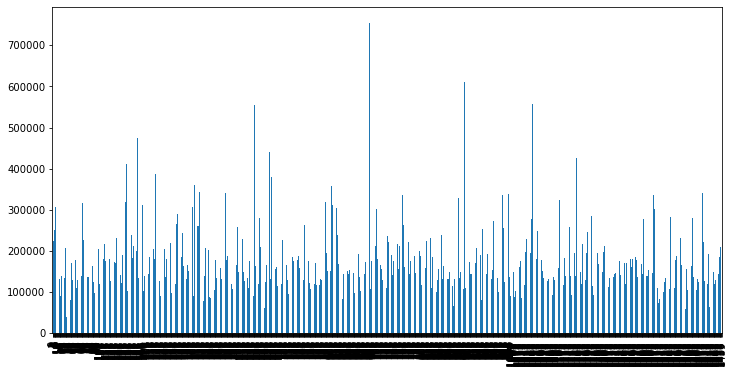

In [61]:
import matplotlib.pyplot as plt 
plt.figure(figsize=(12,6))
prix.SalePrice.plot(kind='bar');

On peut aussi tracer un histogramme de cette variable avec la fonction `hist()` afin d'observer sa distribution. 

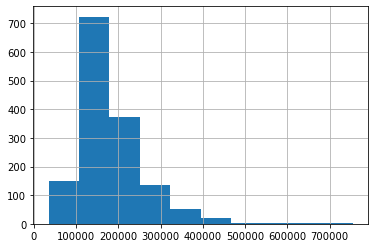

In [62]:
prix.SalePrice.hist();

On peut voir que malgré la praticité on peut être assez vite limité quant à la gestion de nos graphiques, notamment sur le "style". C'est donc pour cela que nous allons voir dans le prochain chapitre la librairie `matplotlib` en détail. 

## Ressources en +

- La documentation officielle pandas et son [Quickstart en 10min](https://pandas.pydata.org/pandas-docs/stable/getting_started/10min.html)
- Pour des piqûres de rappel en python [Python Doctor](https://python.doctor) est là !